<a href="https://colab.research.google.com/github/nblaustein/Machine-Learning/blob/main/Copy_of_assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment #4: Linear Models and Decision Trees
## Foundations of Machine Learning
## Do Q1 and one other question.
### Advice: Reuse your code and code from lectures, package routine tasks into functions, make plans about how you'll carry out the analysis before jumping into writing code, and work as efficiently as possible

**Q1.** This question is a case study for linear models and decision trees. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Let's focus on linear models. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the test set? Make a second model where, for the categorical variables, make a model comprised of one-hot encoded regressors/features alone, and regress price on those variables; what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using, along with the categorical variables. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 3?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.
  7. Now, let's use a regression tree. Construct an appropriate matrix of regressors/features, and fit a tree to the data. Vary the maximum depth of the decision tree using the `max_depth` option (i.e. `tree.DecisionTreeRegressor(max_depth=D)`), and compute the $R^2$ and `RMSE` on the test set of a variety of depths. What depth tree gives the best results?
  8. For your best tree, determine the predicted values for the test data, and plot them against the true values. Do the predicted values and true values line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero?
  12. Which model --- linear model or classification and regression tree --- has better performance on the test set?

In [ ]:
! git clone https://www.github.com/DS3001/model_evaluation
! git clone https://www.github.com/DS3001/assignment4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Cloning into 'model_evaluation'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 20 (delta 4), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (20/20), 2.73 MiB | 8.79 MiB/s, done.
Resolving deltas: 100% (4/4), done.
Cloning into 'assignment4'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 8 (delta 0), reused 0 (delta 0), pack-reused 6
Receiving objects: 100% (8/8), 265.63 KiB | 2.44 MiB/s, done.


In [ ]:
data = pd.read_csv("/content/assignment4/data/cars_hw.csv", index_col=0)
summary = data.describe(include='all')  # Descriptive statistics for all columns
print(summary)

           Make    Make_Year  Color  Body_Type   Mileage_Run No_of_Owners  \
count       976   976.000000    976        976    976.000000          976   
unique       16          NaN     15          5           NaN            3   
top     Hyundai          NaN  white  hatchback           NaN          1st   
freq        305          NaN    200        484           NaN          818   
mean        NaN  2016.963115    NaN        NaN  41571.195697          NaN   
std         NaN     2.818742    NaN        NaN  24390.995134          NaN   
min         NaN  2011.000000    NaN        NaN   1117.000000          NaN   
25%         NaN  2015.000000    NaN        NaN  22676.750000          NaN   
50%         NaN  2017.000000    NaN        NaN  37570.500000          NaN   
75%         NaN  2019.000000    NaN        NaN  57421.250000          NaN   
max         NaN  2022.000000    NaN        NaN  99495.000000          NaN   

        Seating_Capacity Fuel_Type Transmission Transmission_Type  \
count 

<Axes: xlabel='Log_Price', ylabel='Count'>

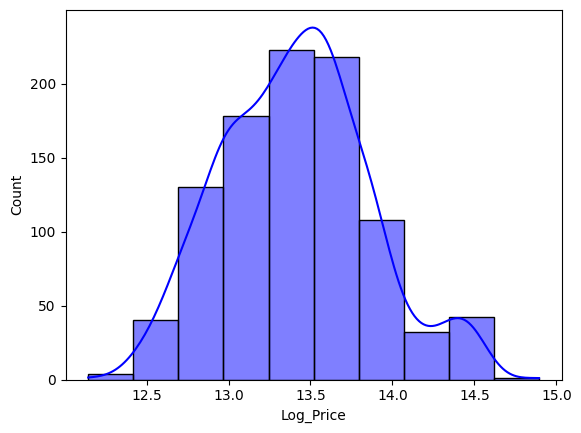

In [ ]:
#1.1 - Cleaning the Car_hw data
##could go back and also windsorize outliers
#log transform the "Price" variable - now the histogram appears approx. normal
import seaborn as sns
#sns.histplot(data["Price"], bins=10, color='blue', kde=True)
data['Log_Price'] = np.log(data['Price'])
sns.histplot(data["Log_Price"], bins=10, color='blue', kde=True)

<Axes: xlabel='Sqrt_Mileage_Run', ylabel='Count'>

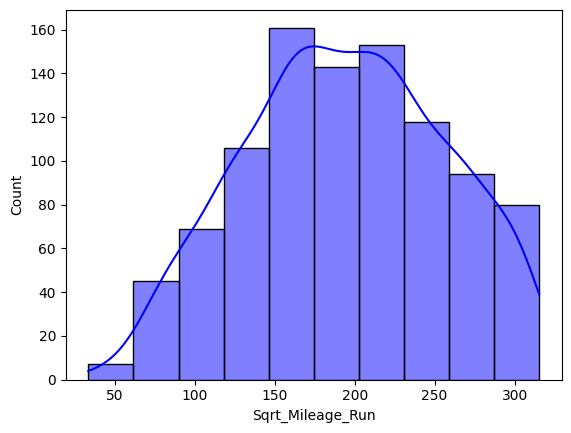

In [ ]:
#log transform the "Mileage_Run" variable - now the histogram appears approx. normal (a little bit skewed left still though)
import seaborn as sns
#sns.histplot(data["Mileage_Run"], bins=10, color='blue', kde=True)
data['Sqrt_Mileage_Run'] = np.sqrt(data['Mileage_Run'])
sns.histplot(data["Sqrt_Mileage_Run"], bins=10, color='blue', kde=True)

count    976.000000
mean      13.411033
std        0.450276
min       12.144197
25%       13.072647
50%       13.409795
75%       13.691080
max       14.894260
Name: Log_Price, dtype: float64
               count       mean       std        min        25%        50%  \
Make                                                                         
Chevrolet        6.0  12.919895  0.480975  12.495004  12.568392  12.752286   
Datsun           3.0  12.576047  0.036311  12.538967  12.558302  12.577636   
Ford            52.0  13.468280  0.210895  12.577636  13.361380  13.469493   
Honda           73.0  13.536318  0.336972  12.663497  13.272506  13.573439   
Hyundai        305.0  13.368511  0.398781  12.421184  13.091904  13.366094   
Jeep             4.0  14.216591  0.105084  14.070153  14.183270  14.240265   
Kia              8.0  14.292177  0.076877  14.129591  14.272242  14.303105   
MG Motors       35.0  14.439052  0.066263  14.278615  14.395744  14.429615   
Mahindra        18.0  13.898

<Axes: xlabel='Log_Price', ylabel='Density'>

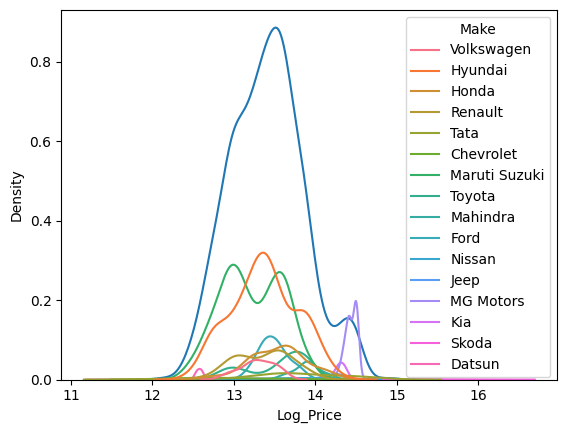

In [ ]:
#1.2
summary_stats = data['Log_Price'].describe()
print(summary_stats)
sns.kdeplot(data['Log_Price'])
summary = data.groupby('Make')['Log_Price'].describe()
print(summary)
sns.kdeplot(data=data, x='Log_Price', hue='Make')

**Which car brands are the most expensive? What do prices look like in general?**
The most expensive car brands are Skoda, Tata, and MG Motors. Most of the ranges of prices for the car brands are pretty spread out, with Jeep having one of the widest ranges as seen in the grouped kernal density plot. Some brands such as MG Motors have a very small range and all of their density is concentrated around a 14.5 log price (around $1,442,000).

In [ ]:
#windsorize function for later
def windsorize(x):
    # Compute IQR and 1st,3rd quantiles
    pct25, pct75 = np.percentile(x,[25,75])
    iqr = pct75 - pct25
    # Compute whiskers:
    lower_whisker = pct25 - iqr*1.5
    upper_whisker = pct75 + iqr*1.5
    # Windsorize x:
    x_windsor = x
    x_windsor[ x < lower_whisker ] = lower_whisker
    x_windsor[ x > upper_whisker ] = upper_whisker
    return(x_windsor)

<Axes: >

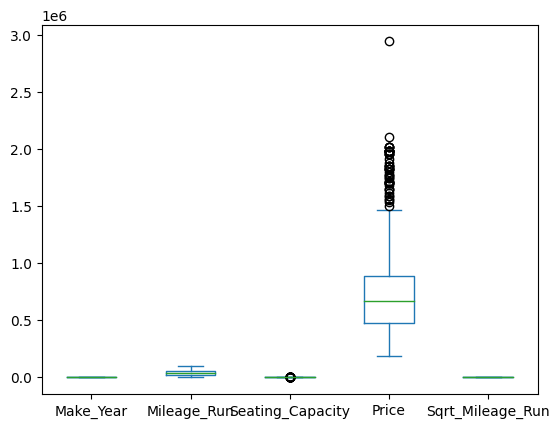

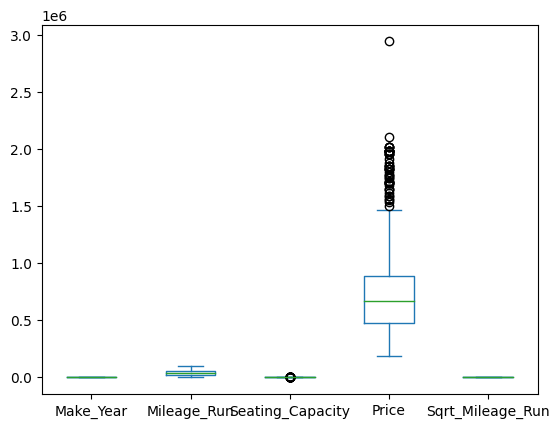

In [ ]:
#1.3 - Split the data into an 80% training set and a 20% testing set.
y = data['Log_Price']
X = data.drop('Log_Price',axis=1)
X.head()
X.plot.box()
#X.apply(windsorize)  how can I get this to windsorize??
X.plot.box()

In [ ]:
vars = ['Log_Price', 'Make', 'Color', 'Body_Type', 'Fuel_Type', 'Transmission', 'Transmission_Type','Price', 'No_of_Owners', 'Mileage_Run' ]
X1 = data.drop(vars,axis=1)

In [ ]:
## Test-train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=50)
TSS = np.sum( (y_test - y_train.mean())**2 )
N_test = len(y_test)

In [ ]:
#1.4 - don't expand features yet until 1.5
#Make a model where you regress price on the numeric variables alone; what is the  R2  and RMSE on the test set?

from sklearn.linear_model import LinearRegression # Import linear regression model
# Fit the model and get the R2 measure:
reg = LinearRegression().fit(X_train, y_train) # Fit the linear model
print(reg.score(X_test, y_test)) # R squared measure

# Predicted values:
y_hat_lm = reg.predict(X_test)
residuals_lm = y_test - y_hat_lm

## Metrics:
SSE_lm = np.sum( (y_test-y_hat_lm)**2 )
RMSE_lm = (SSE_lm/N_test)**(1/2)
print(RMSE_lm)

0.35528012238093853
0.3468181281101239


The R2 is 0.3553 and the RMSE is 0.3468.
This is a very low R2, so the model on just the numeric variables is not very good.

In [ ]:
#One hot encoding categorical variables (drop first level of each dummy to avoid perfect multicollinearity)

data = pd.get_dummies(data, columns=['No_of_Owners'], prefix=['No_of_Owners'], drop_first=True)
data = pd.get_dummies(data, columns=['Make'], prefix=['Make'],drop_first=True)
data = pd.get_dummies(data, columns=['Make_Year'], prefix=['Make_Year'],drop_first=True)
data = pd.get_dummies(data, columns=['Color'], prefix=['Color'],drop_first=True)
data = pd.get_dummies(data, columns=['Body_Type'], prefix=['Body_Type'],drop_first=True)
data = pd.get_dummies(data, columns=['Fuel_Type'], prefix=['Fuel_Type'],drop_first=True)
data = pd.get_dummies(data, columns=['Transmission'], prefix=['Transmission'],drop_first=True)
data = pd.get_dummies(data, columns=['Transmission_Type'], prefix=['Transmission_Type'],drop_first=True)

In [ ]:
data.head()
#Run model on categorical variables now
num_vars =['Log_Price', 'Mileage_Run',"Seating_Capacity", "Price", "Sqrt_Mileage_Run"]
X2 = data.drop(num_vars,axis=1)
X2.head()

,No_of_Owners_2nd,No_of_Owners_3rd,Make_Datsun,Make_Ford,Make_Honda,Make_Hyundai,Make_Jeep,Make_Kia,Make_MG Motors,Make_Mahindra,...,Body_Type_muv,Body_Type_sedan,Body_Type_suv,Fuel_Type_petrol,Fuel_Type_petrol+cng,Transmission_5-Speed,Transmission_6-Speed,Transmission_7-Speed,Transmission_CVT,Transmission_Type_Manual
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
3,1,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1


In [ ]:
## Test-train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=50)
TSS = np.sum( (y_test - y_train.mean())**2 )
N_test = len(y_test)

X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [ ]:
#Run the Linear Regression on the one hot encoded categorical variables
from sklearn.linear_model import LinearRegression # Import linear regression model
from sklearn.preprocessing import PolynomialFeatures

# Fit the model and get the R2 measure:
reg = LinearRegression().fit(X_train, y_train) # Fit the linear model
print(reg.score(X_test, y_test)) # R squared measure

# Predicted values:
y_hat_lm = reg.predict(X_test)
residuals_lm = y_test - y_hat_lm

## Metrics:
SSE_lm = np.sum( (y_test-y_hat_lm)**2 )
MSE_lm = SSE_lm/N_test
RMSE_lm = (SSE_lm/N_test)**(1/2)
print(RMSE_lm)

0.7862850021249533
0.19967962852965584


For the linear regression model using categorical variables alone, the R2 is
0.7863 and the RMSE is 0.1997.

In [61]:
#combine the numeric and categorical variables

X3 = pd.concat([X1,X2], axis=1)
y = data['Log_Price']
X3.head()

,Make_Year,Seating_Capacity,Sqrt_Mileage_Run,No_of_Owners_2nd,No_of_Owners_3rd,Make_Datsun,Make_Ford,Make_Honda,Make_Hyundai,Make_Jeep,...,Body_Type_muv,Body_Type_sedan,Body_Type_suv,Fuel_Type_petrol,Fuel_Type_petrol+cng,Transmission_5-Speed,Transmission_6-Speed,Transmission_7-Speed,Transmission_CVT,Transmission_Type_Manual
1,2017,5,211.213162,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,2016,5,142.495614,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
3,2019,5,171.872045,1,0,0,0,1,0,0,...,0,0,1,1,0,1,0,0,0,1
4,2017,5,188.891503,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
5,2017,5,158.511829,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1


In [62]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.2, random_state=50)

# Calculate the Total Sum of Squares (TSS)
TSS = np.sum((y_test - y_train.mean()) ** 2)

# Get the number of data points in the test set
N_test = len(y_test)

# Ensure column names are of type str (if they aren't already)
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)


In [63]:
#Run a linear regression model on the combined numeric and categorical data
from sklearn.linear_model import LinearRegression # Import linear regression model
from sklearn.preprocessing import PolynomialFeatures

# Fit the model and get the R2 measure:
reg2 = LinearRegression().fit(X_train, y_train) # Fit the linear model
print(reg2.score(X_test, y_test)) # R squared measure

# Predicted values:
y_hat_lm = reg2.predict(X_test)
residuals_lm = y_test - y_hat_lm

## Metrics:
SSE_lm = np.sum( (y_test-y_hat_lm)**2 )
MSE_lm = SSE_lm/N_test
RMSE_lm = (SSE_lm/N_test)**(1/2)
print(RMSE_lm)

# True versus predicted plot
plot1 = plt.scatter(x=y_hat_lm, y=y_test)
plt.title('Predicted vs. Actual Values')
plt.savefig('plot1.png')  # Save the plot as an image file
plt.close()  # Close the current figure to free up resources

# Compute the residuals/errors
residuals = y_test - y_hat_lm

# Kernel density plot for the residuals
plot2 = sns.kdeplot(residuals)
plt.title("Kernel Density Plot of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.savefig('plot2.png')  # Save the plot as an image file
plt.close()  # Close the current figure



0.8030812789232767
0.19167248037880485


For the linear regression model using the combined numeric and categorical variables, the R2 is 0.8031 and the RMSE is 0.1917. This joint model is the best model so far since it has the highest R2 and the lowest RMSE of the three models. Its R2 is about 0.02 higher than the R2 in the model with categorical variables only and its RMSE is 0.008 lower than the RMSE in the model with categorical variables. The R2 of the joint model is about 0.45 higher and its RMSE is about .15 lower than the model with numeric variables only.


In [64]:
#1.5 - expanding the numeric variables and redoing the models

from sklearn.preprocessing import PolynomialFeatures
## Compute all polynomials up to degree 3:
expander = PolynomialFeatures(degree=3,include_bias=False) # Create the expander
Z = expander.fit_transform(X1) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
zdf = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe

#combine the expanded numeric variables with the categorical variables
X4 = pd.concat([zdf, X2], axis=1)
X4.head()

#get lengths of X4 and y to match in order to run the model
index_to_drop = X4[X4.isnull().any(axis=1)].index[0]
X4 = X4.drop(index_to_drop)
#print(len(X4))
#print(len(y))

In [41]:
## Test-train split- running this again
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X4, y, test_size=0.2, random_state=50)
TSS = np.sum( (y_test - y_train.mean())**2 )
N_test = len(y_test)
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [42]:
# Fill missing values in X4 with mean - the model does not handle missing values
X4_filled = X4.fillna(X4.mean())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X4_filled, y, test_size=0.2, random_state=50)

# Ensure column names are of type str
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Fit the model and get the R2 measure:
reg = LinearRegression().fit(X_train, y_train)
print(reg.score(X_test, y_test))

# Predicted values:
y_hat_lm = reg.predict(X_test)
residuals_lm = y_test - y_hat_lm

# Metrics:
SSE_lm = np.sum((y_test - y_hat_lm)**2)
MSE_lm = SSE_lm / N_test
RMSE_lm = (SSE_lm / N_test)**(1/2)
print(RMSE_lm)


0.7745174635998282
0.20510333185718513


In [52]:
# test out different degress and see which gives the best R2 and RMSE
#degree = 4
from sklearn.preprocessing import PolynomialFeatures
## Compute all polynomials up to degree 3:
expander = PolynomialFeatures(degree=4,include_bias=False) # Create the expander
Z = expander.fit_transform(X1) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
zdf = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe
#combine the expanded numeric variables with the categorical variables
X4 = pd.concat([zdf, X2], axis=1)
X4.head()
#get lengths of X4 and y to match in order to run the model
index_to_drop = X4[X4.isnull().any(axis=1)].index[0]
X4 = X4.drop(index_to_drop)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X4, y, test_size=0.2, random_state=50)
TSS = np.sum( (y_test - y_train.mean())**2 )
N_test = len(y_test)
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)
# Fill missing values in X4 with mean
X4_filled = X4.fillna(X4.mean())
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X4_filled, y, test_size=0.2, random_state=50)
# Ensure column names are of type str
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)
# Fit the model and get the R2 measure:
reg = LinearRegression().fit(X_train, y_train)
print(reg.score(X_test, y_test))
# Predicted values:
y_hat_lm = reg.predict(X_test)
residuals_lm = y_test - y_hat_lm
# Metrics:
SSE_lm = np.sum((y_test - y_hat_lm)**2)
MSE_lm = SSE_lm / N_test
RMSE_lm = (SSE_lm / N_test)**(1/2)
print(RMSE_lm)

-49.42807816582993
3.067273259016028


**As you increase the degree of the expansion, how do the  R2  and RMSE change? At what point does  R2  go negative on the test set? For your best model with expanded features, what is the  R2  and RMSE? How does it compare to your best model from part 3?**

As I increase the the degree of the expansion, the R2 becomes larger and more negative and the RMSE becomes much larger. The R2 went negative when I went from degree 3 to degree 4. The best model with expanded features was my model with a degree=3. This model did not perform quite as well as my best model from part 3. This model has an R2 of 0.7745 and an RMSE of 0.2501 compared to my best model from part 3 which had an R2 of 0.8031 and an RMSE of 0.1917.

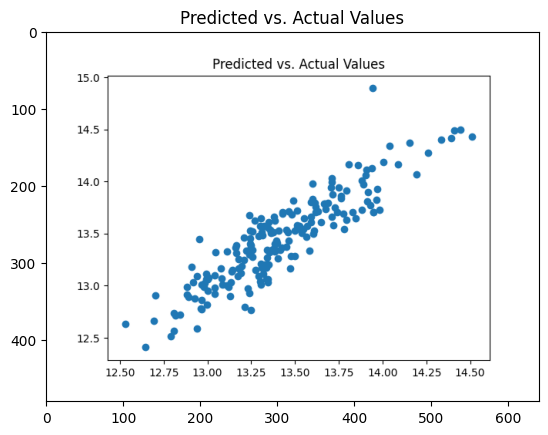

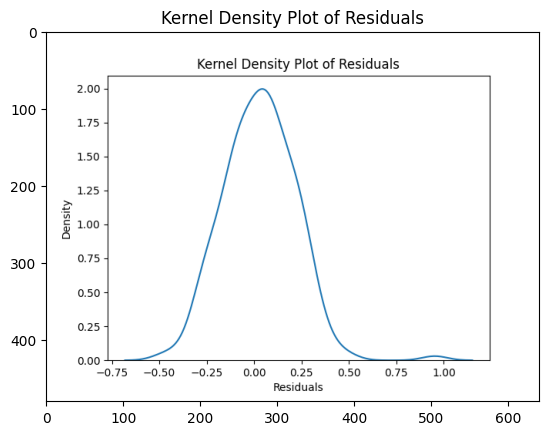

In [60]:
#1.6 - get true vs predicted plot for my best model so far (X3 data, reg2 model)
#these images are called from code directly following the best model creation code
# Load and show the first plot
plot1 = plt.imread('plot1.png')
plt.imshow(plot1)
plt.title('Predicted vs. Actual Values')
plt.show()

# Load and show the second plot
plot2 = plt.imread('plot2.png')
plt.imshow(plot2)
plt.title("Kernel Density Plot of Residuals")
plt.show()



**Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.**

Yes, the predicted and true values roughly line up along the diagonal, aside from the outlier in the top right corner. For the kernal density plot, the residuals do look roughly bell-shaped around zero. Some strengths of this model are that the R2 is pretty high (0.803) and the residuals are approxamately normal.  Although it is not terrible, a weakness could be that the RMSE is not low enough (0.192) and therefore the average magnitude of the errors between predicted and actual values is too high. Another big weakness is that the train test split was done after the data cleaning process, resulting in bias being introduced into the model and likely getting inflated performance metrics. Also by data cleaning first, we likely lost some data in that process before creating the training and testing datasets.

In [ ]:
#1.7  - creating a regression tree on the data

## Test-train split- running this again
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.2, random_state=50)
TSS = np.sum( (y_test - y_train.mean())**2 )
N_test = len(y_test)

X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

**Note**: I should have done one test train split at the beginning rather than cleaning the data first, creating new x variables, and doing the test/train split each time before running each model. Doing the test/train split each time took a lot of uneccessary code and is also not in the best data science practice, which I realized after going through this model building process. Doing the split first would make the model performance metrics more accurate and also prevent data leakage.

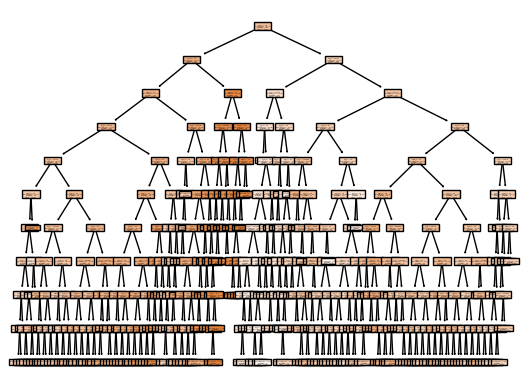

0.22347478655081837
0.735345491556362


In [ ]:
#1.7 continued
from sklearn import tree
model = tree.DecisionTreeRegressor(max_depth=10) # Fit the classifier
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True)
plt.show()
## Make Predictions on the Test Set
y_hat_cart = cart.predict(X_test)
residuals_cart = y_test - y_hat_cart

## Metrics:
SSE_cart = np.sum((y_test - y_hat_cart) ** 2)
RMSE_cart = (SSE_cart / N_test) ** 0.5
R2_cart = 1 - SSE_cart / TSS
print(RMSE_cart)
print(R2_cart)

In [ ]:
#testing different inputs for max_depth
from sklearn import tree

# Create empty lists to store results
depths = []  # To store max_depth values
RMSEs = []  # To store RMSE values
R2s = []    # To store R-squared values

# Vary max_depth values and evaluate the model- used chat gpt to get the regression tree code into a working for loop
for max_depth in range(1, 26):  # Try depths from 1 to 25
    model = tree.DecisionTreeRegressor(max_depth=max_depth)  # Fit the classifier
    cart = model.fit(X_train, y_train)

    # Make predictions on the test set
    y_hat_cart = cart.predict(X_test)

    # Calculate residuals
    residuals_cart = y_test - y_hat_cart

    # Calculate metrics
    SSE_cart = np.sum((y_test - y_hat_cart) ** 2)
    RMSE_cart = (SSE_cart / N_test) ** 0.5
    R2_cart = 1 - SSE_cart / TSS

    # Append results to the lists
    depths.append(max_depth)
    RMSEs.append(RMSE_cart)
    R2s.append(R2_cart)

    # Print the results for this max_depth
    print(f"Max Depth: {max_depth}, RMSE: {RMSE_cart}, R-squared: {R2_cart}")

# Find the best max_depth based on RMSE or R-squared, depending on your goal
best_depth_RMSE = depths[RMSEs.index(min(RMSEs))]
best_depth_R2 = depths[R2s.index(max(R2s))]

print(f"Best Max Depth (based on RMSE): {best_depth_RMSE}")
print(f"Best Max Depth (based on R-squared): {best_depth_R2}")


Max Depth: 1, RMSE: 0.35168464011585615, R-squared: 0.3445658945506531
Max Depth: 2, RMSE: 0.3211880983356051, R-squared: 0.4533100092462815
Max Depth: 3, RMSE: 0.29922483819186374, R-squared: 0.5255204315615241
Max Depth: 4, RMSE: 0.2690017235007581, R-squared: 0.6165291470140861
Max Depth: 5, RMSE: 0.2537163649462124, R-squared: 0.6588705645889636
Max Depth: 6, RMSE: 0.256484422551559, R-squared: 0.6513864835255662
Max Depth: 7, RMSE: 0.24387590808486093, R-squared: 0.684818996845884
Max Depth: 8, RMSE: 0.24110049151181004, R-squared: 0.6919519770173057
Max Depth: 9, RMSE: 0.23066193297215437, R-squared: 0.7180487082118887
Max Depth: 10, RMSE: 0.22911951728240318, R-squared: 0.7218068669026125
Max Depth: 11, RMSE: 0.23654089008520038, R-squared: 0.7034931795176116
Max Depth: 12, RMSE: 0.23223767821983354, R-squared: 0.7141833027461929
Max Depth: 13, RMSE: 0.22986148334501158, R-squared: 0.7200021836670338
Max Depth: 14, RMSE: 0.21836117093066706, R-squared: 0.747318722820552
Max Dept

The best regression tree out of the depths I tested, has a depth of 14.

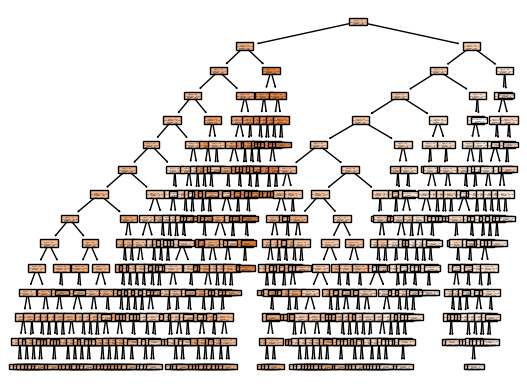

In [ ]:
#regression tree with depth of 14
model = tree.DecisionTreeRegressor(max_depth=14) # Fit the classifier
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True)
plt.show()

## Make Predictions on the Test Set
y_hat_cart = cart.predict(X_test)
residuals_cart = y_test - y_hat_cart

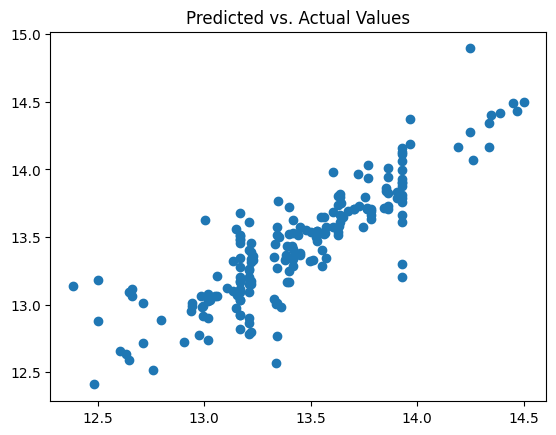

In [ ]:
#1.8
#For your best tree, determine the predicted values for the test data, and plot them against the true values.
#Do the predicted values and true values line up along the diagonal, or not? Compute the residuals/errors for the
# test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero?

## True versus predicted plot:
plt.scatter(x=y_hat_cart,y=y_test)
plt.title('Predicted vs. Actual Values')
plt.show()


Yes, the predicted and true values line up on a diagonal.

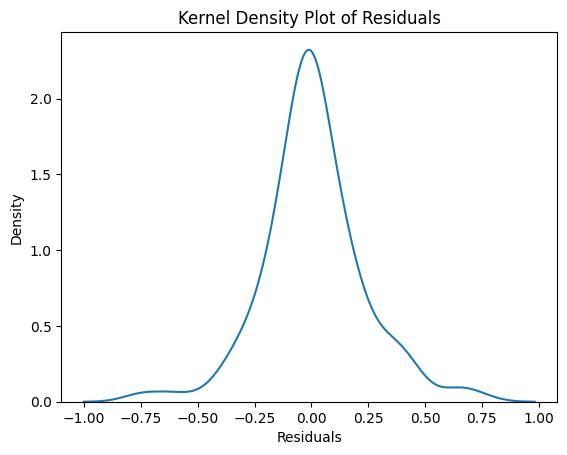

In [ ]:
#compute the residuals/errors
residuals_cart = y_test - y_hat_cart
# Create a kernel density plot for the residuals
sns.kdeplot(residuals_cart)
plt.title("Kernel Density Plot of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.show()

Yes, the residuals do look roughly bell shaped around zero.

**Q2.** The is a question about regression using decision trees and linear models. The data include wages at data science-y jobs, including

  - `Rating`: Company worker happiness score
  - `Size`: Number of employees
  - `Sector`: Part of the economy
  - `avg_salary`: Average wage
  - `job_state`: Location of work

  1. Load the `wages_hw.csv` file. Split the sample into an ~80% training set and a ~20% test set. Do any necessary cleaning, including outliers and missings.
  2. Use a linear model to regress `avg_salary` on `Sector`. Which sectors have the highest predicted wages? What is the $R^2$ and `RMSE` on the test set?
  3. Make a scatterplot of `avg_salary` and `Rating`. Is there an obvious visual relationship between the two variables? Regress `avg_salary` on `Rating` as a numeric variable: Do higher ratings predict higher or lower wages? Convert `Rating` to a one-hot encoded variable, with a category for each rating. Run a regression of `avg_salary` on the categorical version. How do your results change? Explain. Which version has a higher $R^2$ and lower `RMSE`?
  4. Now interact `Sector` with the categorical version of `Rating`, so your regressors are a (Sector, Rating) pair; this is a programming puzzle you'll have to think about, but using the `.PolynomialFeatures()` function on the one-hot encoded categorical variables is one option, and another is pre-processing a new variable that interacts `Sector` and `Rating` and then one-hot encoding the result. Regress `avg_salary` on the (Sector, Rating) pairs. How does the $R^2$ and `RMSE` on the test set compare to part 2? Interpret the coefficients; which sector-rating pairs have the highest wages?
  5. Run a linear regression of `avg_salary` on all the variables. What is the $R^2$ on the test set? How does it compare to your simpler models in 2--4?
  6. Build a decision tree by regressing `avg_salary` on `Sector`, `Rating`, and the (Sector, Rating) pairs. What are the $R^2$ and `RMSE` of your models on the test set? How do your answers compare to parts 2, 3, and 4?
  7. Build a decision tree by regressing `avg_salary` on all the other variables. What is the $R^2$ and `RMSE` on the test set?
  8. Build a linear regression or decision tree using the available variables based on your own judgment. What degrees of freedom are you giving the model to predict variation in wages across company and location attributes? What is the $R^2$ and `RMSE` of your model? How does it compare to the previous ones in the question? Why does yours perform better or worse on the test set?

**Q3.** This a question purely on categorical prediction. The data for this happen to be gathered in 1987 in Indonesia, and concern contraceptive method choice. The questions and data-gathering assumptions reflect the culture and attitudes of that time and place, but provide a good example of a categorical prediction problem on an important topic (family planning and maternal health The variables in the data are:

    - Wife's age (numerical)
    - Wife's education (categorical) 1=low, 2, 3, 4=high
    - Husband's education (categorical) 1=low, 2, 3, 4=high
    - Number of children ever born (numerical)
    - Wife's religion (binary) 0=Non-Islam, 1=Islam
    - Wife's now working? (binary) 0=Yes, 1=No
    - Husband's occupation (categorical) 1, 2, 3, 4
    - Standard-of-living index (categorical) 1=low, 2, 3, 4=high
    - Media exposure (binary) 0=Good, 1=Not good
    - Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-termhort-term

  1. Load the `contraceptiveMethodChoice.csv` data. Tabulate the `method` variable (i.e. `.value_counts()`). 1 corresponds to `No Contraception`, 3 corresponds to `Short Term` (e.g. condoms, birth control pills), and 2 corresponds to `Long Term` (e.g. IUD, sterilization). Cross tabulate `method` and `numberChildren`. Do couples that use birth control tend to have more children than those who don't?
  2. Split the sample into ~80% training data and ~20% testing data.
  3. We are now going to make a mistake. Train a regression tree to predict the contraceptive method using the other variables in the data, not a classification tree. Look at the terminal nodes in the tree: What values do they take? Does that make sense? Explain clearly what has gone wrong here.
  4. Instead of regression, use a classification tree to predict contraceptive method using the other variables in the data. How does it look different from the previous tree? What variables does the algorithm use? In broad terms, which groups of people are most likely to use each method of contraception?
  5. Compute a confusion matrix for your classification tree on the test set (Hint: There are now three categories instead of two, so the cross tabulation will be a $3 \times 3$ matrix instead of $2 \times 2$.). Compute the Accuracy of your model overall, and the Accuracy for predicting each contraceptive method.
  7. Why can't you use a linear probability model to do this exercise? Explain clearly in words.

In [ ]:
#3.1
df = pd.read_csv('/content/assignment4/data/contraception_hw.csv', index_col=0)
df.describe()
df.head()

,age,edu,edu_spouse,numberChildren,religion,working,spouse_occupation,standardOfLivingIndex,mediaExposure,method
1,24,2,3,3,1,1,2,3,0,1
2,45,1,3,10,1,1,3,4,0,1
3,43,2,3,7,1,1,3,4,0,1
4,42,3,2,9,1,1,3,3,0,1
5,36,3,3,8,1,1,3,2,0,1


In [ ]:
# Tabulate the "method" variable
method_tabulation = df["method"].value_counts()

# Perform a cross-tabulation of "method" and "numberChildren"
cross_tabulation = pd.crosstab(df["method"], df["numberChildren"])

print(method_tabulation)
print(cross_tabulation)

1    629
3    511
2    333
Name: method, dtype: int64
numberChildren  0    1    2    3   4   5   6   7   8   9   10  11  12  13  16
method                                                                       
1               95  143  114   70  57  44  35  18  29   5   9   6   4   0   0
2                0   46   56   70  62  36  27  19   9   3   2   2   0   1   0
3                2   87  106  119  78  55  30  12   9   8   0   3   0   1   1


From the cross tabulation it appears that couples that use birth control (method=3) tend to have more kids than those who don't use anything (method=1), but only up until around 6 kids where from then on those who don't use anything tend to have more.

In [ ]:
#3.2 - split into training and testing
y = df['method']
X = df.drop('method',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
TSS = np.sum( (y_test - y_train.mean())**2 )
N_test = len(y_test)

X.head()

,age,edu,edu_spouse,numberChildren,religion,working,spouse_occupation,standardOfLivingIndex,mediaExposure
1,24,2,3,3,1,1,2,3,0
2,45,1,3,10,1,1,3,4,0
3,43,2,3,7,1,1,3,4,0
4,42,3,2,9,1,1,3,3,0
5,36,3,3,8,1,1,3,2,0


[Text(0.5, 0.8333333333333334, 'x[3] <= 0.5\nsquared_error = 0.773\nsamples = 1178\nvalue = 1.918'),
 Text(0.25, 0.5, 'x[0] <= 17.5\nsquared_error = 0.099\nsamples = 79\nvalue = 1.051'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 3.0'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.051\nsamples = 78\nvalue = 1.026'),
 Text(0.75, 0.5, 'x[0] <= 37.5\nsquared_error = 0.764\nsamples = 1099\nvalue = 1.98'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.764\nsamples = 776\nvalue = 2.112'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.62\nsamples = 323\nvalue = 1.663')]

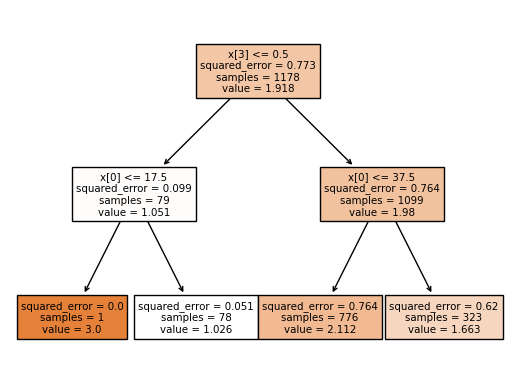

In [ ]:
#3.3 - creating a regression tree
from sklearn import tree

model = tree.DecisionTreeRegressor(max_depth=2) # Fit the classifier
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True)



The terminal nodes take on the values of 3.0, 1.026, 2.112, and 1.663 (for a max depth of 2). This doesn't make sense because the values are decimals rather than whole numbers. The problem here is that the regression tree is treating the categorical 'method' variable as a continuous variable, so it giving one singular decimal value at each terminal node, rather than a whole value for each type of  
contraceptive method.

[Text(0.5, 0.8333333333333334, 'x[3] <= 0.5\ngini = 0.644\nsamples = 1178\nvalue = [508, 259, 411]'),
 Text(0.25, 0.5, 'x[0] <= 17.5\ngini = 0.049\nsamples = 79\nvalue = [77, 0, 2]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.025\nsamples = 78\nvalue = [77, 0, 1]'),
 Text(0.75, 0.5, 'x[1] <= 3.5\ngini = 0.652\nsamples = 1099\nvalue = [431, 259, 409]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.609\nsamples = 676\nvalue = [324, 100, 252]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.657\nsamples = 423\nvalue = [107, 159, 157]')]

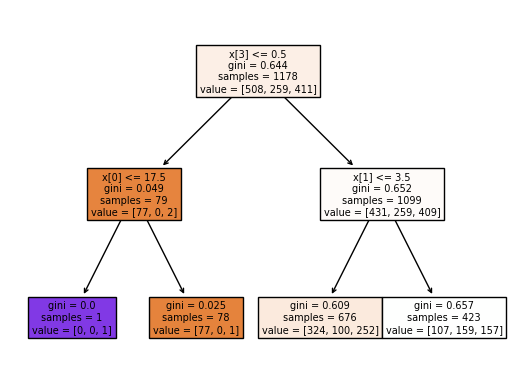

In [ ]:
model = tree.DecisionTreeClassifier(max_depth=2) # Fit the classifier
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True)

**How does it look different from the previous tree? What variables does the algorithm use? In broad terms, which groups of people are most likely to use each method of contraception?**

The classification tree, unlike the regression tree, has a list of 3 values, one for each method level instead of just one decimal value. Also these values now represent the number of data points predicted to be in each class at that node.The variables used by the algorithm are age(x[0]), edu(x[1]), and numberChildren(x[3]). In broad terms, wives with less than one child and under the age of 17.5 tend to not use any contraception (method=1), while wives with less than one child and an education level of less than or equal to 3.5 level (almost 'high level') tend to use either long term contraception (method=2) or short term contraception like birth control (method=3).

In [ ]:
#3.5
from sklearn.metrics import confusion_matrix, accuracy_score
# Make predictions on the test set
y_hat_cart = cart.predict(X_test)
# Compute the confusion matrix
confusion = confusion_matrix(y_test, y_hat_cart)

# Compute the overall accuracy
overall_accuracy = accuracy_score(y_test, y_hat_cart)

# Calculate accuracy for predicting each contraceptive method
accuracy_per_method = [confusion[i, i] / confusion[i, :].sum() for i in range(confusion.shape[0])] #got this line of code from chat gpt

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)

# Print the overall accuracy
print(f"Overall Accuracy: {overall_accuracy:.2f}")

# Print accuracy for each contraceptive method
for i, accuracy in enumerate(accuracy_per_method):
    print(f"Accuracy for Method {i+1}: {accuracy:.2f}")


Confusion Matrix:
[[89 32  0]
 [26 48  0]
 [62 38  0]]
Overall Accuracy: 0.46
Accuracy for Method 1: 0.74
Accuracy for Method 2: 0.65
Accuracy for Method 3: 0.00


#3.6
**Why can't you use a linear probability model to do this exercise?**

A linear probability model could not be used to do this exercise because linear probability models are designed to classify binary variables and our goal was to classify contraceptive method which contains 3 categories.

**Q4.** This is a question where we use regression and regression trees. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running these regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q5.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{eqnarray*}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{eqnarray*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{eqnarray*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{eqnarray*}

which can be written in terms of sample covariance and sample variance as:

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{eqnarray*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)
6. Let's return to the question of *outliers*. With your formula for the OLS coefficients $(a^*,b^*)$, explain what happens if you significantly increase a single value of the outcome/target/response variable $y_i$ or one of the predictor/explanatory/covariate variables $x_i$. If values for some extreme observations are exerting significant influence over the regression coefficients, will the model perform well on for more average observations?